# Objectives


1. What are Decision Trees ? How are they used in classification problems
2. Implement a classification Decision Tree on the penguins dataset
3. Decision Tree implementation in scikit-learn and how to plot
4. What is a Random Forest(RF) ? What are RF advantages ?
5. Random Forest implementation in scikit-learn

# Warm up

In teams of 2-3, research the term **Decision Tree** and try answer out the following:

1. Which type/types of ML problems it can solve ?
2. What advantages/disadvantages does it have ?
3. Place the concepts warm-up exercise

## 1. What are Decision Trees ?

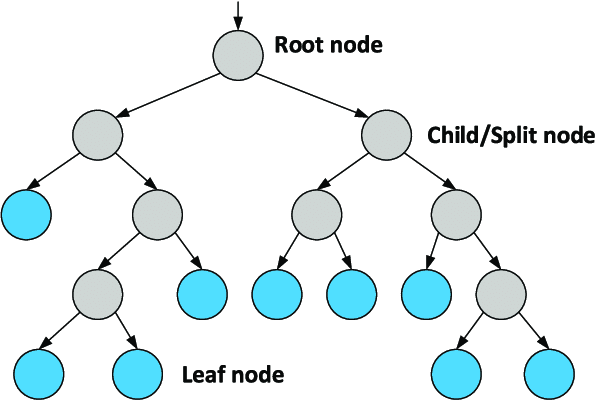

## 2. Implement a DT from Scratch

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [49]:
# read the penguins dataset

penguins = pd.read_csv("penguins_clean.csv")


In [50]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


In [51]:
## we want to use bill dimensions to decide/classify penguins' species

penguins = penguins[['bill_length_mm', 'bill_depth_mm', 'species']]

penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bill_length_mm  333 non-null    float64
 1   bill_depth_mm   333 non-null    float64
 2   species         333 non-null    object 
dtypes: float64(2), object(1)
memory usage: 7.9+ KB


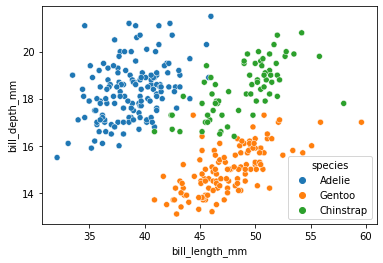

In [52]:
# plot 

sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species');

### Q: How can we use the two features we have to separate the three classes ?

In [53]:
# we need to get a prediction of every penguin in our dataset using condition statements on the two features we have

In [54]:
# separate features and target

X = penguins[['bill_length_mm', 'bill_depth_mm']]

y = penguins['species']

In [55]:
X.shape, y.shape

((333, 2), (333,))

In [57]:
X.head()

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,36.7,19.3
4,39.3,20.6


### Decision Tree #1

In [56]:
for i, row in X.iterrows():
    print(i)
    print(row)

0
bill_length_mm    39.1
bill_depth_mm     18.7
Name: 0, dtype: float64
1
bill_length_mm    39.5
bill_depth_mm     17.4
Name: 1, dtype: float64
2
bill_length_mm    40.3
bill_depth_mm     18.0
Name: 2, dtype: float64
3
bill_length_mm    36.7
bill_depth_mm     19.3
Name: 3, dtype: float64
4
bill_length_mm    39.3
bill_depth_mm     20.6
Name: 4, dtype: float64
5
bill_length_mm    38.9
bill_depth_mm     17.8
Name: 5, dtype: float64
6
bill_length_mm    39.2
bill_depth_mm     19.6
Name: 6, dtype: float64
7
bill_length_mm    41.1
bill_depth_mm     17.6
Name: 7, dtype: float64
8
bill_length_mm    38.6
bill_depth_mm     21.2
Name: 8, dtype: float64
9
bill_length_mm    34.6
bill_depth_mm     21.1
Name: 9, dtype: float64
10
bill_length_mm    36.6
bill_depth_mm     17.8
Name: 10, dtype: float64
11
bill_length_mm    38.7
bill_depth_mm     19.0
Name: 11, dtype: float64
12
bill_length_mm    42.5
bill_depth_mm     20.7
Name: 12, dtype: float64
13
bill_length_mm    34.4
bill_depth_mm     18.4
Name: 13,

In [58]:
predictions = []

for i, row in X.iterrows():
    # i: index, row: values of a row as a pd.Series
    if row['bill_length_mm'] < 42:
        predictions.append('Adelie')
    else:
        if row['bill_depth_mm'] > 17:
            predictions.append('Chinstrap')
        else:
            predictions.append('Gentoo')

In [59]:
predictions

['Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Chinstrap',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 'Adelie',
 '

In [60]:
# what is the accuracy of this DT ?

round(accuracy_score(predictions, y),3)

0.904

### Q: can I make this DT a bit more accurate ?

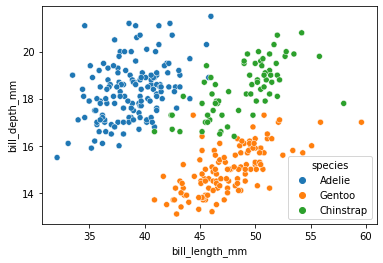

In [61]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species');

### Decision Tree #2

In [66]:
predictions = []

for i, row in X.iterrows():
    # i: index, row: values of a row as a pd.Series
    if row['bill_length_mm'] < 43:
        if row['bill_depth_mm'] > 15:
            predictions.append('Adelie')
        else:
            predictions.append('Gentoo')
        
    else:
        if row['bill_depth_mm'] > 17:
            predictions.append('Chinstrap')
        else:
            predictions.append('Gentoo')

In [67]:
# what is the accuracy of this DT ?

round(accuracy_score(predictions, y),3)

0.931

## 3. Decision Tree Implementation in sklearn

In [14]:
# import the classes you need

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [74]:
m_tree = DecisionTreeClassifier(max_depth=4)  
m_tree.fit(X, y)

DecisionTreeClassifier(max_depth=4)

In [75]:
predictions = m_tree.predict(X)

round(accuracy_score(predictions, y),3)

0.961

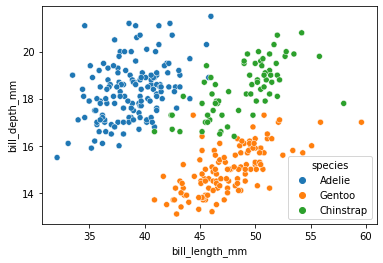

In [76]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species');

### How can we visualize the DT ?

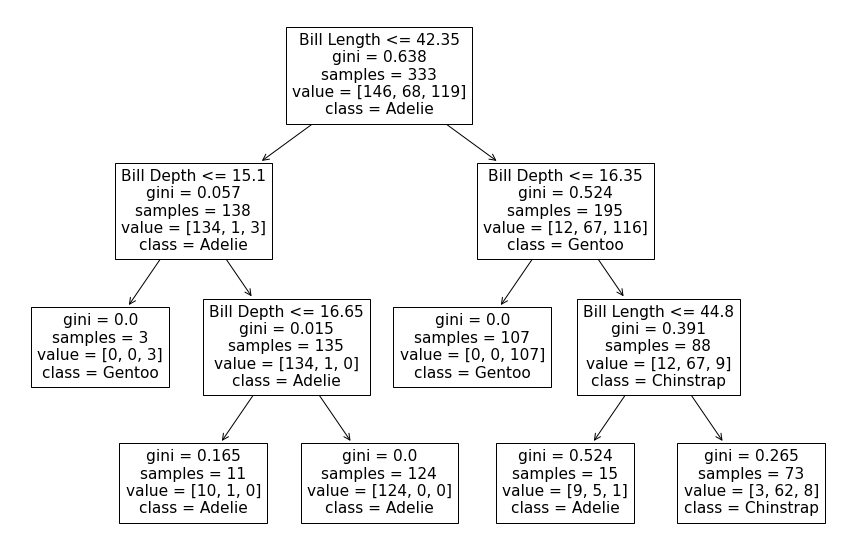

In [73]:
plt.figure(figsize=(15, 10))
t = plot_tree(m_tree, feature_names=['Bill Length', 'Bill Depth'], class_names=['Adelie', 'Chinstrap', 'Gentoo'])

### Q: So DT are awesome! What is the catch here ?

### Disadvantages of Decision Trees

1. They are unstable, i.e. small changes in the training data can lead to massive change in the structure of the optimal decision tree produced by training 
2. Prone to overfitting on training data -- this leads to relatively low accuracy on unseen/test data compared to other algorithms

### Let's illustrate this by splitting our data to training and validation sets

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=123)

In [78]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((233, 2), (100, 2), (233,), (100,))

In [79]:
# train DT on training data

m_tree = DecisionTreeClassifier(max_depth=2)  
m_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

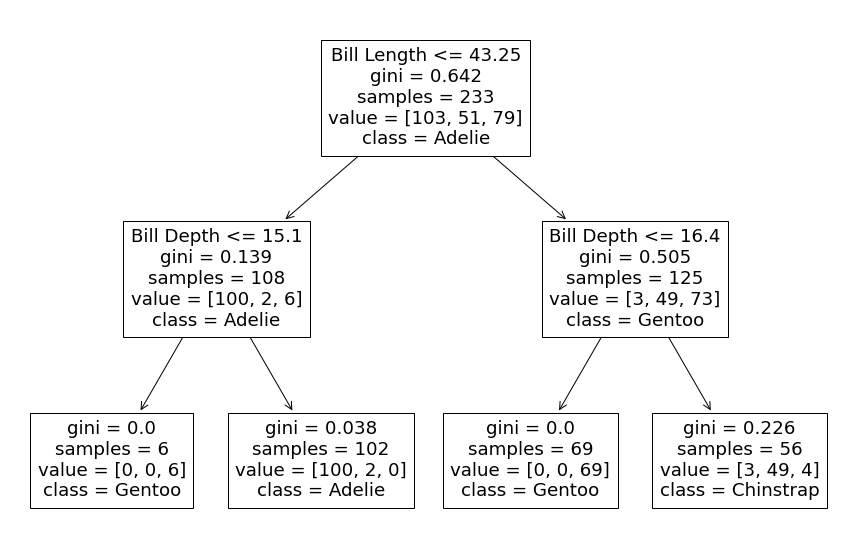

In [80]:
# plot optimal DT

plt.figure(figsize=(15, 10))
t = plot_tree(m_tree, feature_names=['Bill Length', 'Bill Depth'], class_names=['Adelie', 'Chinstrap', 'Gentoo'])

In [81]:
# evaluate model training and validation accuracy

print("training accuracy = ", m_tree.score(X_train, y_train))

print("validation accuracy = ", m_tree.score(X_val, y_val))


training accuracy =  0.9613733905579399
validation accuracy =  0.9


## 4. Random Forest

- Buildings blocks are N decision trees


- The decision trees operate as an **Ensemble**


- Ensembles in classification used the wisdom of the crowd principle: **A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models**


### Q: How does RF algorithm ensure that the individual DTs are different/uncorrelated ?

1. **Bootstrapping** == each individual tree randomly samples from the training dataset with replacement, resulting in different trees with different structures

2. **Feature randomness** == each tree will consider only a fraction of the features in the data to split on


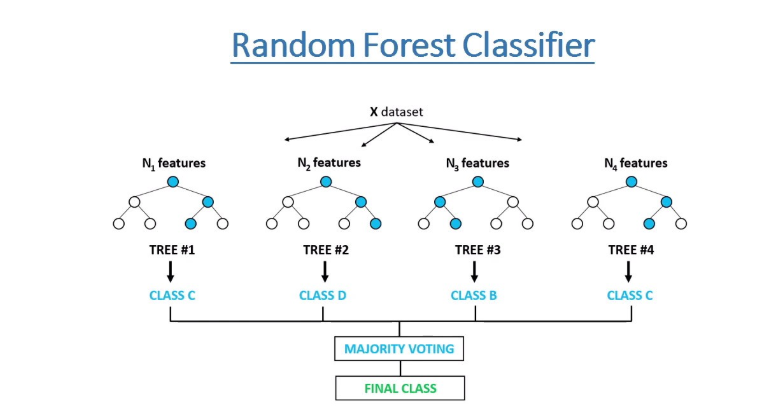

### Example on Sampling with and without replacement using pandas

In [83]:
# sampling with replacement

my_list = [1, 4, 5, 8, 9, 11, 16]

my_df = pd.DataFrame(my_list, columns=['values'])

#my_sample = my_df.sample(6, replace=True)

In [84]:
my_df

,values
0,1
1,4
2,5
3,8
4,9
5,11
6,16


In [88]:
my_sample = my_df.sample(7, replace=True)

my_sample

,values
2,5
6,16
3,8
2,5
4,9
3,8
4,9


### Random Forest advantages:

## 5. Random Forest Implementation in scikitlearn

In [89]:
# import the model class

from sklearn.ensemble import RandomForestClassifier

In [90]:
# train RF on training data

m_rf = RandomForestClassifier()

m_rf.fit(X_train, y_train)

RandomForestClassifier()

In [91]:
# evaluate model training and validation accuracy

print("training accuracy = ", m_rf.score(X_train, y_train))

print("validation accuracy = ", m_rf.score(X_val, y_val))


training accuracy =  1.0
validation accuracy =  0.94
